# Regression

Task: predict the cost of a wedding, given the attendance and the couple's income figures.

## Step 1. Choose the learning algorithm

Import the linear regression class.

In [1]:
# setting logging to print only error messages from Sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

from sklearn.linear_model import LinearRegression

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Step 2. Choose initialization parameters

As indicated in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on `LinearRegression`, several initialization parameters need to be set. We will use all the default ones, so there is no need to pass any arguments (but we could override them if needed, for example, require not to fit the intercept by passing `fit_intercept=False`).

In [2]:
lin_reg = LinearRegression()

# inspect the class of the variable and its attributes
lin_reg

LinearRegression()

## Step 3. Prepare the data

Load the data and arrange into into X (the features matrix) and y (the target vector).

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("Weddings.csv")
df.head()

,CoupleIncome,Attendance,WeddingCost
0,130000.0,300.0,60700.0
1,157000.0,350.0,52000.0
2,98000.0,150.0,47000.0
3,72000.0,200.0,42000.0
4,86000.0,250.0,34000.0


The first two columns are independent variables, the last one is the target variable.

The input to the regression algorithm must be two NumPy arrays: one for all the independent variables and one for the target variable. The data contained in the Pandas dataframe can be accessed via the `values` attribute.

In [4]:
# all rows, the first two columns
X = df.values[:, :2]

# all rows, the last column
y = df.values[:, -1]

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (25, 2)
Shape of y: (25,)


That is, the number of rows in both arrays is the same. The `X` array contains two columns (the two predictor variables) and the `y` array contains one column (the target variable).

## Step 4. Fit the model

Call `fit()`. It will return an object holding the fitted model.

In [5]:
model = lin_reg.fit(X, y)

Once the model has been trained, we can access the estimated parameters of the model:

In [6]:
# intercept
model.intercept_

-7002.447077706023

In [7]:
# coefficients
model.coef_

array([ 0.31240207, 53.03090213])

We can look up the $R^2$ score for the fitted model:

In [8]:
model.score(X, y)

0.7343682845869217

## Step 5. Predict the target for a new instance

Predict the cost of wedding, if there will be 175 guests and the couple's income is $100,000.

Create a two-dimensional NumPy array, containing a single row. The columns are the same as in the training data: the first value is the couple's income, the second is the attendance.

In [9]:
new_instance = np.array([[100000, 175]])
y_hat = model.predict(new_instance)
y_hat

array([33518.16789185])

# Classification

We will use the Iris dataset containing measurements of petals and sepals for different examples of three species of the iris.

We will split the dataset into a training and a test set, train a decision tree on the training set, and evaluate it on the test set.

## Step 1. Import the class implementing a selected ML algorithm

In [10]:
from sklearn.tree import DecisionTreeClassifier

## Step 2. Specify initialization parameters

According to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), the `DecisionTreeClassifier` class has various initialization parameters. We will use default settings, except for `max_depth`, which we will set to 2 so as to avoid building a large tree.

In [11]:
dtree = DecisionTreeClassifier(max_depth=2)

## Step 3. Prepare the data

We will use the Iris dataset that is comes built-in with the scikit-learn distribution:

In [12]:
from sklearn.datasets import load_iris

iris_data = load_iris()

# the built-in dataset is an object with several attributes: 
# "data" (predictor features), 
# "feature_names" (the names of the features)
# "target" (the target variable as integers),
# "target_names" (the class labels)

In [13]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
iris_data.data.shape

(150, 4)

 There are 150 rows and 4 columns in the dataset.
 
To split the data into a training and a test set, we can use `train_test_split`, a utility function in scikit-learn. We can specify the desired size of the test set using the `test_size` argument. Here, we want the test data to be 10% of the whole dataset:

In [16]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(iris_data.data, iris_data.target,
                                                random_state=1, test_size=0.1)

In [17]:
Xtrain.shape

(135, 4)

In [18]:
Xtest.shape

(15, 4)

In [19]:
ytrain.shape

(135,)

In [20]:
ytest.shape

(15,)

So the training set contains 135 instances, and the test set contains 15 instances.

## Step 4. Fit the model

Train the model on the training data:

In [21]:
model = dtree.fit(Xtrain, ytrain)

The model object contains estimated model parameters, as well as the feature importance scores:

In [22]:
model.feature_importances_

array([0., 0., 0., 1.])

Thus, the most important classification feature is "petal width (cm)" - it is the most useful one for separating instances belonging to different classes.

We can also visualize the trained decision tree:

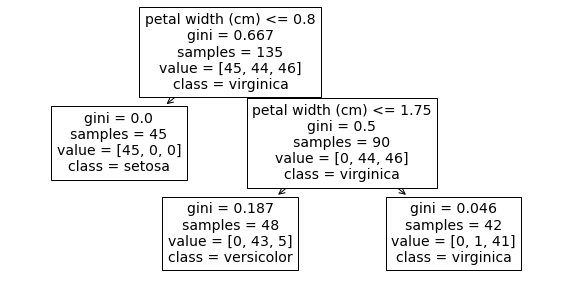

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# define the figure size
fig = plt.figure(figsize=(10,5))
ax = plt.axes()

# plot the tree
dummy = plot_tree(model, 
          class_names=iris_data.target_names, 
          feature_names=iris_data.feature_names, 
          ax=ax)

## Step 5. Evaluate the model on the test set

Use the estimated model to produce predictions on the test set (predictions are usually indicated with $\hat{y}$, so the variable holding predictions is `yhat`):

In [24]:
yhat = model.predict(Xtest)
yhat.shape

(15,)

Compare the predictions with true values of `y` visually:

In [25]:
yhat

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1])

In [26]:
ytest

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1])

Calculate precision, recall and f-score:

In [27]:
from sklearn.metrics import precision_recall_fscore_support

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Precision: 1.0
Recall: 1.0
F score: 1.0


# Citing this notebook

If you use this notebook in your work, please cite it as follows:
    
Pekar, V. (2022). Big Data for Decision Making. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/vpekar/bd4dm
